# Plotting raster data using the `rasterVis` R package

Data used: OS Terrain® 50 (<https://osdatahub.os.uk/downloads/open/Terrain50>)

In [2]:
# import libraries
library("rasterVis")

Loading required package: raster

Loading required package: sp

Loading required package: terra

terra version 1.3.4

Loading required package: lattice

Loading required package: latticeExtra



In [3]:
# set plot resolution
options(repr.plot.res = 200)

In [4]:
# read the digital terrain model
# OS Terrain 50
dtm <- merge(
    raster("data/Terrain50/sn91_OST50GRID_20210507/SN91.asc"),
    raster("data/Terrain50/sn92_OST50GRID_20210507/SN92.asc"),
    raster("data/Terrain50/so01_OST50GRID_20210507/SO01.asc"),
    raster("data/Terrain50/so02_OST50GRID_20210507/SO02.asc")
)

Warning message in showSRID(SRS_string, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
“Discarded datum Ordnance Survey of Great Britain 1936 in Proj4 definition”
Warning message in showSRID(SRS_string, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
“Discarded datum Ordnance Survey of Great Britain 1936 in Proj4 definition”
Warning message in showSRID(SRS_string, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
“Discarded datum Ordnance Survey of Great Britain 1936 in Proj4 definition”
Warning message in showSRID(SRS_string, format = "PROJ", multiline = "NO", prefer_proj = prefer_proj):
“Discarded datum Ordnance Survey of Great Britain 1936 in Proj4 definition”


In [4]:
# view the DTM
dtm

class      : RasterLayer 
dimensions : 400, 400, 160000  (nrow, ncol, ncell)
resolution : 50, 50  (x, y)
extent     : 290000, 310000, 210000, 230000  (xmin, xmax, ymin, ymax)
crs        : +proj=tmerc +lat_0=49 +lon_0=-2 +k=0.999601272 +x_0=400000 +y_0=-100000 +ellps=airy +units=m +no_defs 
source     : memory
names      : layer 
values     : 113.2, 883.6  (min, max)


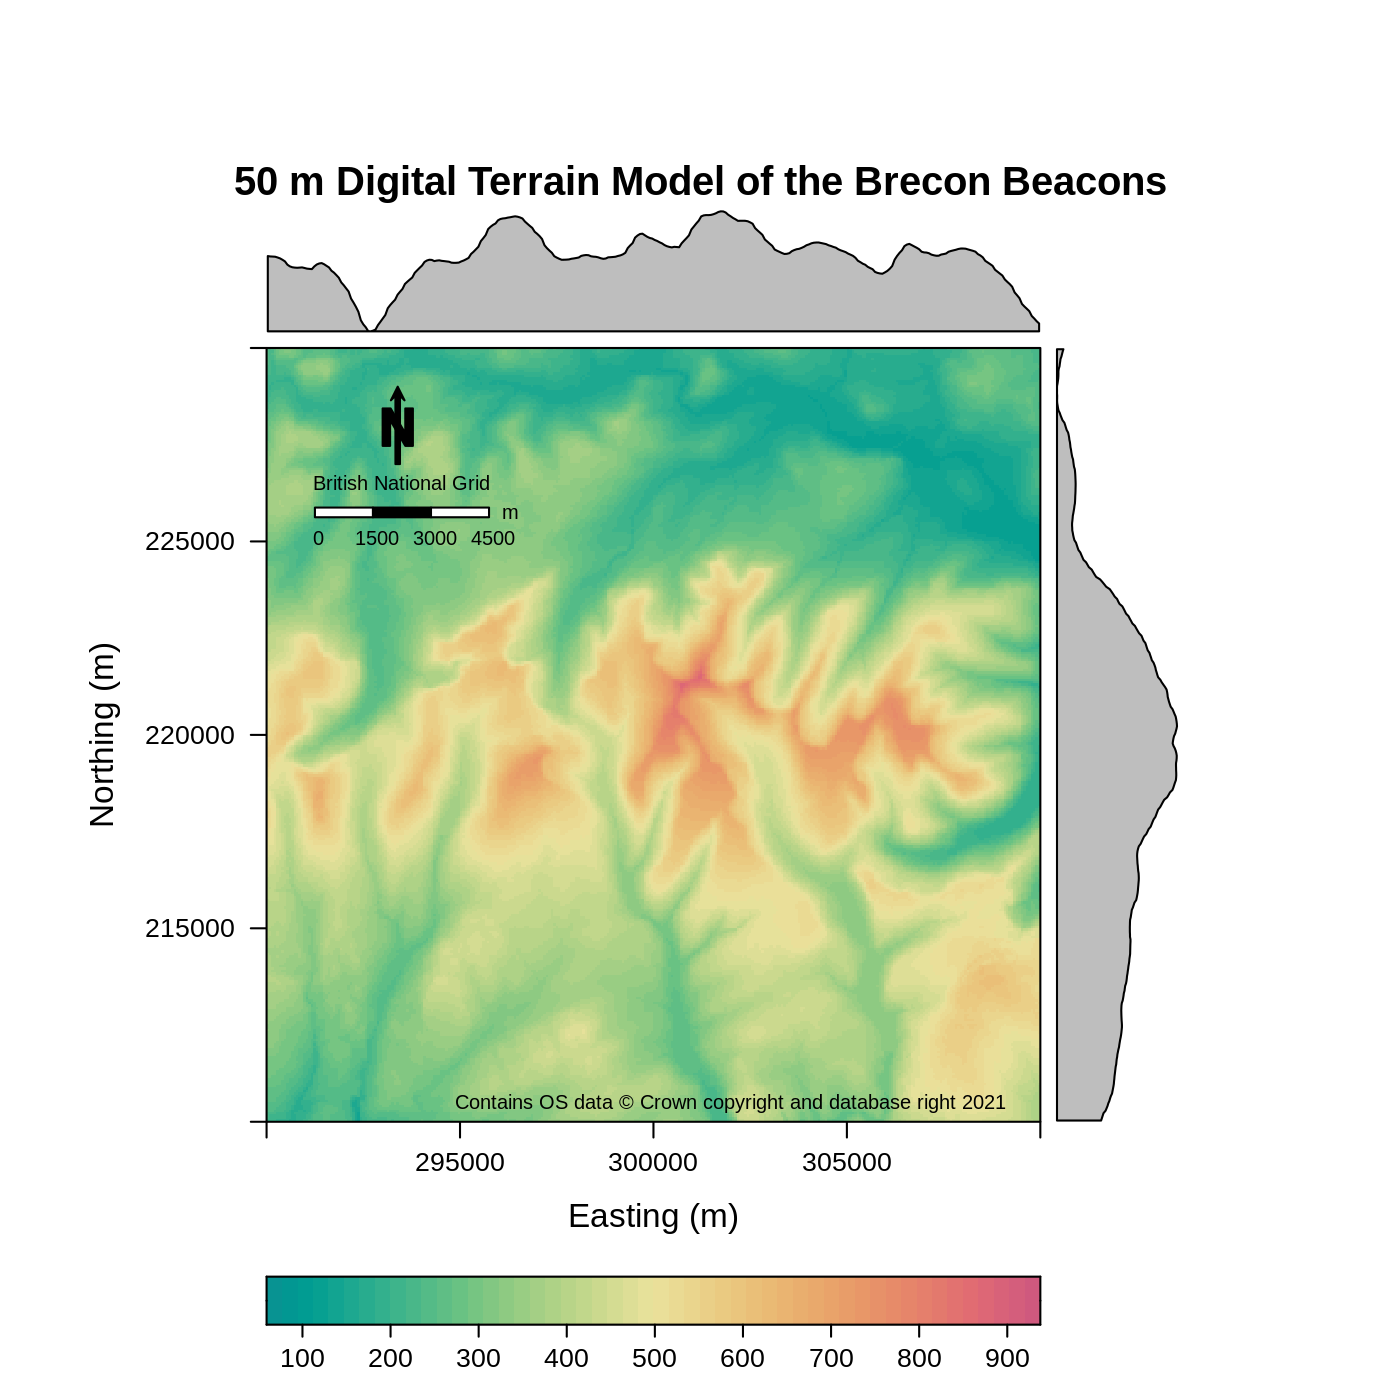

In [5]:
# plot the DTM
levelplot(
    dtm,
    xlab = "Easting (m)",
    ylab = "Northing (m)",
    main = "50 m Digital Terrain Model of the Brecon Beacons",
    cuts = 49,
    col.regions = hcl.colors(n = 50, palette = "Temps")
) +
layer({
    # add a north arrow
    SpatialPolygonsRescale(
        layout.north.arrow(), offset = c(293000, 227000), scale = 2000
    )
    xs <- seq(292000, 292000 + 3000, by = 1500)
    # draw a scale bar
    grid.rect(
        x = xs,
        y = 225750,
        width = 1500,
        height = 250,
        gp = gpar(fill = rep(c("white", "black"), 2)),
        default.units = "native"
    )
    # add scale bar labels
    grid.text(
        x = seq(292000, 292000 + 4500, by = 1500) - 650,
        y = 225100, seq(0, 4500, by = 1500),
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add scale bar unit
    grid.text(
        x = 296300,
        y = 225750,
        "m",
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add projection info
    grid.text(
        x = 293500,
        y = 226500,
        "British National Grid",
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add copyright info
    grid.text(
        x = 302000,
        y = 210500,
        "Contains OS data © Crown copyright and database right 2021",
        gp = gpar(cex = .6),
        default.units = "native"
    )
})

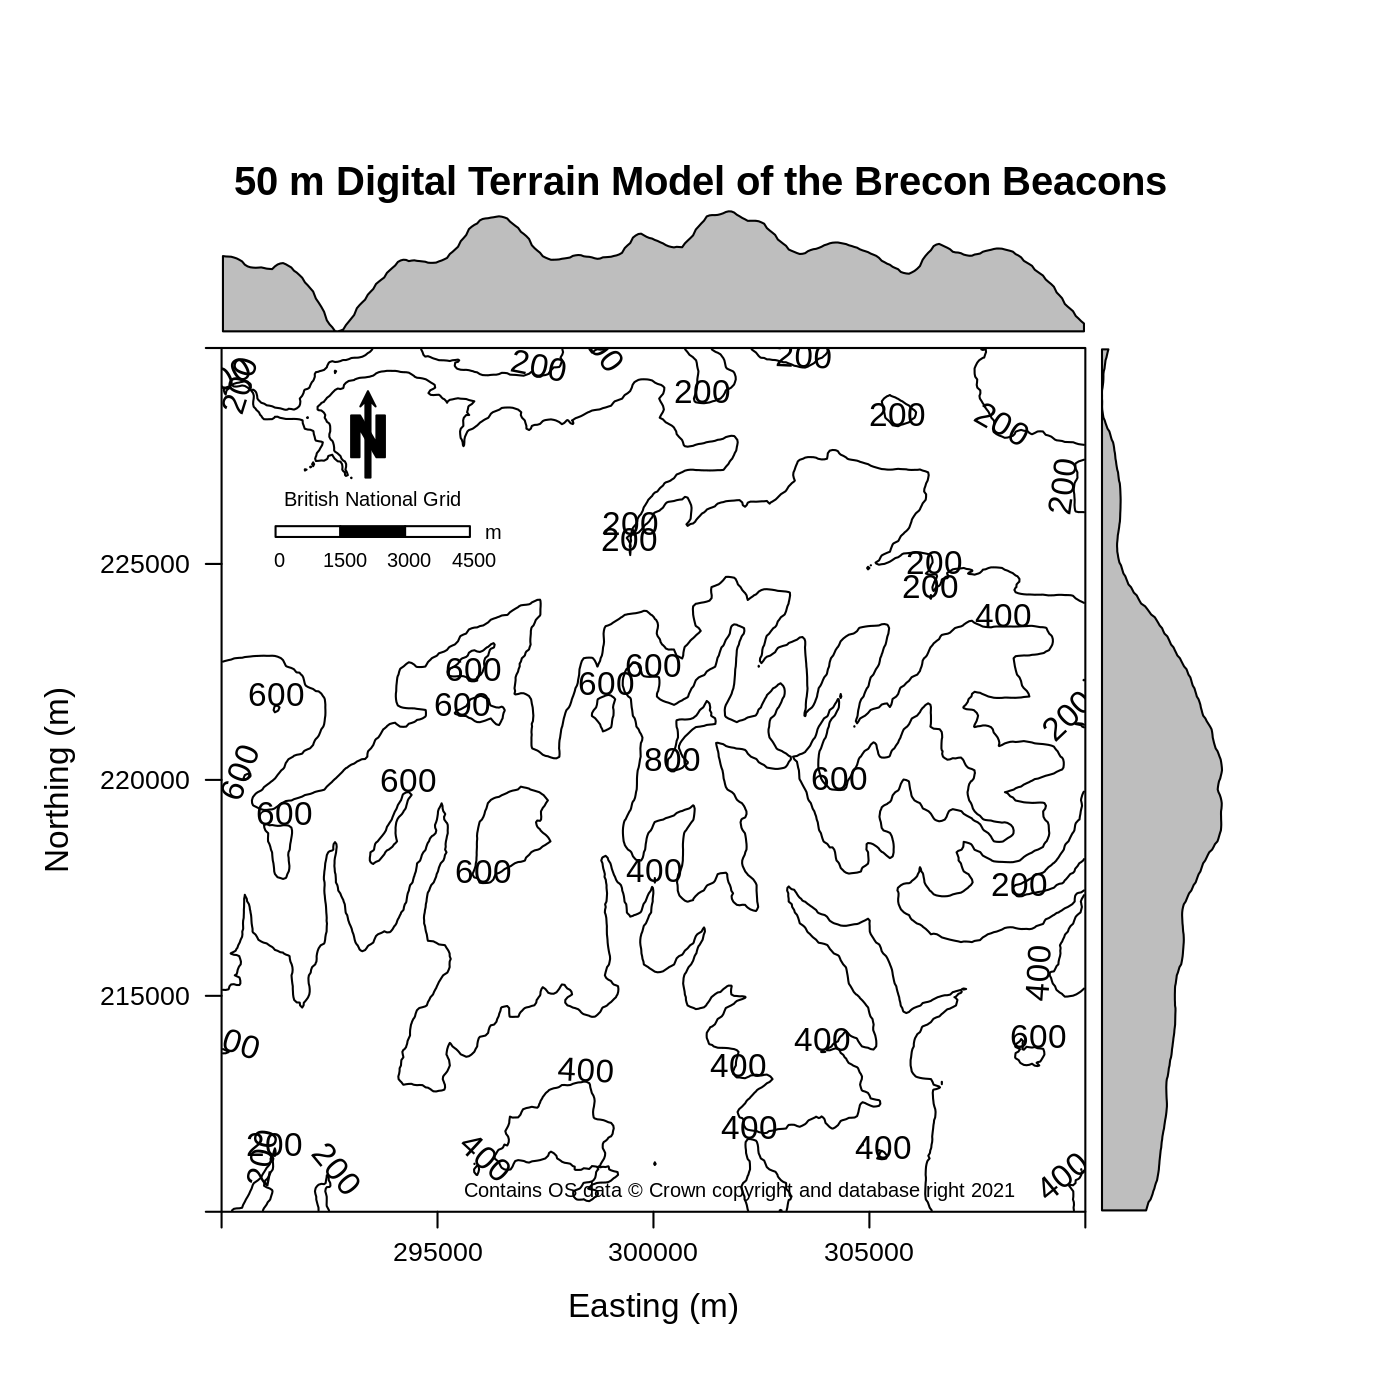

In [10]:
# contours
contourplot(
    dtm,
    xlab = "Easting (m)",
    ylab = "Northing (m)",
    main = "50 m Digital Terrain Model of the Brecon Beacons",
    cuts = 5
) +
layer({
    # add a north arrow
    SpatialPolygonsRescale(
        layout.north.arrow(), offset = c(293000, 227000), scale = 2000
    )
    xs <- seq(292000, 292000 + 3000, by = 1500)
    # draw a scale bar
    grid.rect(
        x = xs,
        y = 225750,
        width = 1500,
        height = 250,
        gp = gpar(fill = rep(c("white", "black"), 2)),
        default.units = "native"
    )
    # add scale bar labels
    grid.text(
        x = seq(292000, 292000 + 4500, by = 1500) - 650,
        y = 225100, seq(0, 4500, by = 1500),
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add scale bar unit
    grid.text(
        x = 296300,
        y = 225750,
        "m",
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add projection info
    grid.text(
        x = 293500,
        y = 226500,
        "British National Grid",
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add copyright info
    grid.text(
        x = 302000,
        y = 210500,
        "Contains OS data © Crown copyright and database right 2021",
        gp = gpar(cex = .6),
        default.units = "native"
    )
})

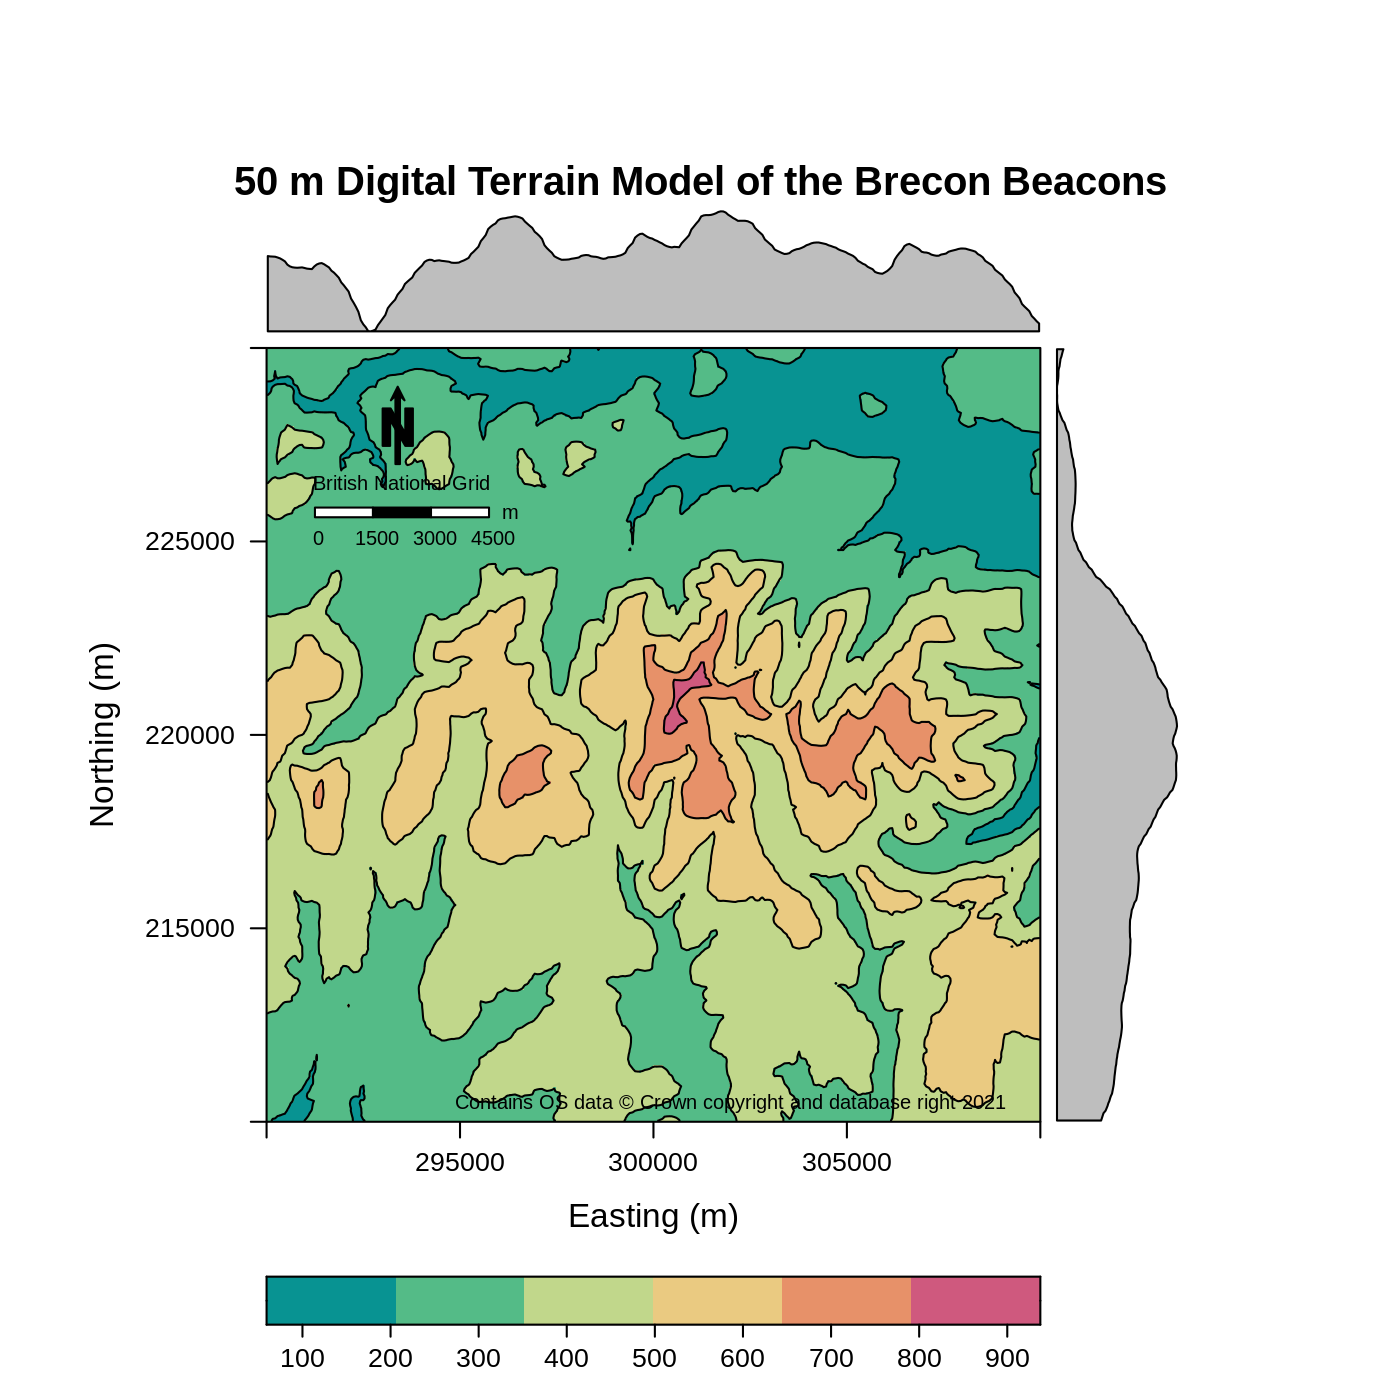

In [12]:
# DTM with contours
levelplot(
    dtm,
    xlab = "Easting (m)",
    ylab = "Northing (m)",
    main = "50 m Digital Terrain Model of the Brecon Beacons",
    cuts = 5,
    col.regions = hcl.colors(n = 50, palette = "Temps"),
    contour = TRUE
) +
layer({
    # add a north arrow
    SpatialPolygonsRescale(
        layout.north.arrow(), offset = c(293000, 227000), scale = 2000
    )
    xs <- seq(292000, 292000 + 3000, by = 1500)
    # draw a scale bar
    grid.rect(
        x = xs,
        y = 225750,
        width = 1500,
        height = 250,
        gp = gpar(fill = rep(c("white", "black"), 2)),
        default.units = "native"
    )
    # add scale bar labels
    grid.text(
        x = seq(292000, 292000 + 4500, by = 1500) - 650,
        y = 225100, seq(0, 4500, by = 1500),
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add scale bar unit
    grid.text(
        x = 296300,
        y = 225750,
        "m",
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add projection info
    grid.text(
        x = 293500,
        y = 226500,
        "British National Grid",
        gp = gpar(cex = .6),
        default.units = "native"
    )
    # add copyright info
    grid.text(
        x = 302000,
        y = 210500,
        "Contains OS data © Crown copyright and database right 2021",
        gp = gpar(cex = .6),
        default.units = "native"
    )
})